
Animes.csv contains 19311 datapoints with 12 features namely: uid,	title, synopsis,	genre,	aired, episodes,	members, popularity, ranked, score, img_url and link. This file contains some duplicate values after whose removal leads to 16216 datapoints. After removing duplicate rows, we deal with NaN values in the score and episodes category. The feature 'scores' contains 341 NaN values which are replaced with global average score calculated from the whole dataset. The feature 'episodes' contains 492 NaN values which are replaced with global average episode number calculated from the whole dataset. We also extract the total number of genres mentioned in the 'genre' feature of the dataset. The total number of genres mentioned in the dataset are 43. We also find the distribution of genres over the whole dataset to understand animes of which genres are frequent. We found the top five most frequent genres: comedy,action,fantasy,mystery and drama. We also find the distribution of genres over the years to understand the trend of genres over the period of roughly 90 years. Through this, we can understand the trend of genres over the years and what genres have become more popular over the recent years. We can see animes with genres of comedy , action, fantasy and especially slice of life have become more frequent over the recent years. We also plot the distribution of the number of animes being aired every year over the period of 90 years. From 1998 to 2019, we see a spike in the number of animes being aired every year and after 2019, we see a drop in the number of new animes being aired, which can be correlated to the pandemic effects. Animes with higher ranks in the dataset have the highest scores.

reviews.csv contains 192112 reviews with 7 features namely: uid, profile, anime_uid, text, score, scores and link. The feature 'scores' contains 6 fields which are Overall, Animation, Character, Sound, Enjoyment and Story. For every anime reviewed in the dataset, we calculated the average of each of the fields in the 'scores' category for each anime and number of reviews per anime. We try to understand the ranks given to the animes in the 'animes.csv' can be correlated with the average score for each anime with the number of reviews. We find the the average score does not correlate with the rank as per the dataset and we need to take into account the number of reviews along with average score to estimate rank.

profiles.csv contains 81727 datapoints with 5 features namely: profile, gender, birthday, favorites_anime and link.  This file contains some duplicate values after whose removal leads to 47885 datapoints. We use the gender feature of the dataset to understand the distribution of the users' gender. We have been given a list of favourite animes list per user. We leverage this to find which animes occur frequently in every user's list and we rank the animes based on how many times the anime has appeared in all the users' favorite list. We compared the estimated ranks with the ranks provided in the animes.csv file for each anime. We do see some correlation and hence determine the baseline prediction case to predict the score an user will give to the anime.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Exploration -

animes.csv

-How many users, items , entries

-Distribution of ratings

-How many rows are NaN

-Total number of genres and distribution of genres

-Genre to year distribution

Reviews.csv

-Total no of different fields in score

-Distribution of top fields

Profiles.csv

-Gender distribution

-Age disribution

-Top favourite animes and check if it corresponds with popularity/rank in animes.csv


Related Literature -

https://ieeexplore.ieee.org/document/9430244/references#references

https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4121831


Kaggle refer


In [1]:
import pandas as pd

In [2]:
%cd "/content/drive/My Drive/Colaboratory/Assg2/"

[Errno 2] No such file or directory: '/content/drive/My Drive/Colaboratory/Assg2/'
/content


In [3]:
animes = pd.read_csv('animes.csv')

FileNotFoundError: ignored

In [ ]:
animes[:25]

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
5,37510,Mob Psycho 100 II,"Shigeo ""Mob"" Kageyama is now maturing and unde...","['Action', 'Slice of Life', 'Comedy', 'Superna...","Jan 7, 2019 to Apr 1, 2019",13.0,442310,176,21.0,8.89,https://cdn.myanimelist.net/images/anime/1918/...,https://myanimelist.net/anime/37510/Mob_Psycho...
6,199,Sen to Chihiro no Kamikakushi,"Stubborn, spoiled, and naïve, 10-year-old Chih...","['Adventure', 'Supernatural', 'Drama']","Jul 20, 2001",1.0,913212,40,20.0,8.90,https://cdn.myanimelist.net/images/anime/6/795...,https://myanimelist.net/anime/199/Sen_to_Chihi...
7,38000,Kimetsu no Yaiba,"Ever since the death of his father, the burden...","['Action', 'Demons', 'Historical', 'Shounen', ...","Apr 6, 2019 to Sep 28, 2019",26.0,575037,106,19.0,8.92,https://cdn.myanimelist.net/images/anime/1286/...,https://myanimelist.net/anime/38000/Kimetsu_no...
8,35247,Owarimonogatari 2nd Season,Following an encounter with oddity specialist ...,"['Mystery', 'Comedy', 'Supernatural', 'Vampire']","Aug 12, 2017 to Aug 13, 2017",7.0,189944,573,18.0,8.93,https://cdn.myanimelist.net/images/anime/6/873...,https://myanimelist.net/anime/35247/Owarimonog...
9,2904,Code Geass: Hangyaku no Lelouch R2,"One year has passed since the Black Rebellion,...","['Action', 'Military', 'Sci-Fi', 'Super Power'...","Apr 6, 2008 to Sep 28, 2008",25.0,992196,27,17.0,8.93,https://cdn.myanimelist.net/images/anime/4/939...,https://myanimelist.net/anime/2904/Code_Geass_...


In [ ]:
animes = animes.drop_duplicates(subset=['uid'])
animes.sort_values(by=['popularity'])

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
740,1535,Death Note,"A shinigami, as a god of death, can kill any p...","['Mystery', 'Police', 'Psychological', 'Supern...","Oct 4, 2006 to Jun 27, 2007",37.0,1871043,1,52.0,8.65,https://cdn.myanimelist.net/images/anime/9/945...,https://myanimelist.net/anime/1535/Death_Note
681,16498,Shingeki no Kyojin,"Centuries ago, mankind was slaughtered to near...","['Action', 'Military', 'Mystery', 'Super Power...","Apr 7, 2013 to Sep 29, 2013",25.0,1754979,2,111.0,8.47,https://cdn.myanimelist.net/images/anime/10/47...,https://myanimelist.net/anime/16498/Shingeki_n...
8409,11757,Sword Art Online,"In the year 2022, virtual reality has progress...","['Action', 'Adventure', 'Fantasy', 'Game', 'Ro...","Jul 8, 2012 to Dec 23, 2012",25.0,1657823,3,1771.0,7.49,https://cdn.myanimelist.net/images/anime/11/39...,https://myanimelist.net/anime/11757/Sword_Art_...
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
16,30276,One Punch Man,The seemingly ordinary and unimpressive Saitam...,"['Action', 'Sci-Fi', 'Comedy', 'Parody', 'Supe...","Oct 5, 2015 to Dec 21, 2015",12.0,1475219,5,50.0,8.68,https://cdn.myanimelist.net/images/anime/12/76...,https://myanimelist.net/anime/30276/One_Punch_Man
...,...,...,...,...,...,...,...,...,...,...,...,...
3028,40957,Shin Chuuka Ichiban! 2,Sequel of Shin Chuuka Ichiban,"['Comedy', 'Shounen']",Not available,NaN,601,16334,NaN,NaN,https://cdn.myanimelist.net/images/anime/1684/...,https://myanimelist.net/anime/40957/Shin_Chuuk...
1600,40902,Shokugeki no Souma: Gou no Sara,Fifth season of Shokugeki no Souma . \r\n \r\n,"['Ecchi', 'School', 'Shounen']","Apr, 2020 to ?",NaN,31394,16335,NaN,NaN,https://cdn.myanimelist.net/images/anime/1335/...,https://myanimelist.net/anime/40902/Shokugeki_...
14675,40540,Sword Art Online: Alicization - War of Underwo...,Second part of Sword Art Online: Alicization ...,"['Action', 'Game', 'Adventure', 'Romance', 'Fa...","Apr, 2020 to ?",11.0,16098,16336,NaN,NaN,https://cdn.myanimelist.net/images/anime/1438/...,https://myanimelist.net/anime/40540/Sword_Art_...
1568,40907,World Trigger 2,NaN,"['Action', 'Sci-Fi', 'Supernatural', 'School',...",Not available,NaN,8316,16337,NaN,NaN,https://cdn.myanimelist.net/images/anime/1200/...,https://myanimelist.net/anime/40907/World_Trig...


In [ ]:
total_no_of_animes = len(animes['uid'].unique())
total_no_of_animes

16216

In [ ]:
import math
s=set()
X=[]
avg=0
v=0
a1=0
v1=0
nan_score_no = 0
nan_epi_no = 0

for i,d in animes.iterrows():
  # print(d['genre'].split("'"))
  l=d['genre'].split("'")
  # X.append([l])
  z=[]
  if not math.isnan(d['score']):
    avg+=int(d['score'])
    v+=1
  else:
    nan_score_no += 1
  if not math.isnan(d['episodes']):
    a1+=int(d['episodes'])
    v1+=1
  else:
    nan_epi_no += 1

  for i in range(1,len(l),2):
    s.add(l[i])
    z.append(l[i])
    # print(l[i])
  X.append(z)
  # break
  # s.update(d['genre'])
  # for x in d['genre']:
  #   if x=="'":

  #   s.add(x)
avg_score=avg/v
avg_episodes=a1/v1
print("Total No. of NaN Entries in Score Category: ",nan_score_no)
print("Total No. of NaN Entries in Episodes Category: ",nan_epi_no)


Total No. of NaN Entries in Score Category:  341
Total No. of NaN Entries in Episodes Category:  492


In [ ]:
len(s)
s=list(s)
print(len(s))
s

43


['Military',
 'Mystery',
 'Shoujo Ai',
 'Romance',
 'Action',
 'Yaoi',
 'Vampire',
 'Adventure',
 'Samurai',
 'Comedy',
 'Dementia',
 'Sports',
 'Cars',
 'Supernatural',
 'Magic',
 'Yuri',
 'Police',
 'Historical',
 'Space',
 'Psychological',
 'Kids',
 'Shounen Ai',
 'Hentai',
 'Parody',
 'Josei',
 'Drama',
 'Super Power',
 'Sci-Fi',
 'Fantasy',
 'Music',
 'Game',
 'Horror',
 'Ecchi',
 'School',
 'Demons',
 'Martial Arts',
 'Thriller',
 'Shounen',
 'Mecha',
 'Slice of Life',
 'Shoujo',
 'Harem',
 'Seinen']

In [ ]:
import random
genre_to_year = {}
animes_year = {}
genre_distribution = {}
for i,d in animes.iterrows():
  if d['aired'] == 'Not available':
    y = str(random.randrange(1955, 2000))
  elif len(d['aired'].split(' ')) == 1 or  len(d['aired'].split(' ')) == 3:
    y = d['aired'].split(' ')[0]
  elif len(d['aired'].split(' ')) == 2 or len(d['aired'].split(' ')) == 4:
    y = d['aired'].split(' ')[1]
  else:
    y = d['aired'].split(' ')[2]
  if (len(list(y))) != 4:
    y = d['aired'].split(' ')[2]
    if (len(list(y))) != 4:
      y = d['aired'].split(' ')[1]
      if (len(list(y))) != 4:
        y = d['aired'].split(' ')[0]
  y =int(y)
  if not y in animes_year:
    animes_year[y] = 1
  else:
    animes_year[y] += 1

  if not y in genre_to_year:
    genre_to_year[y] = {}


  l=d['genre'].split("'")
  for i in range(1,len(l),2):
    if not l[i] in genre_distribution:
      genre_distribution[l[i]] = 1
    else:
      genre_distribution[l[i]] += 1

    if not l[i] in genre_to_year[y]:
      genre_to_year[y][l[i]] = 1
    else:
      genre_to_year[y][l[i]] += 1


In [ ]:
myKeys = list(genre_to_year.keys())
myKeys.sort()
sorted_dict = {i: genre_to_year[i] for i in myKeys}

print(sorted_dict)

{1917: {'Comedy': 11, 'Samurai': 1, 'Drama': 4, 'Kids': 2, 'Cars': 1}, 1918: {'Drama': 3, 'Comedy': 1, 'Demons': 1, 'Historical': 2, 'Kids': 1, 'Fantasy': 1}, 1924: {'Fantasy': 1, 'Comedy': 1, 'Historical': 1}, 1925: {'Drama': 1, 'Fantasy': 2, 'Historical': 1, 'Supernatural': 1, 'Slice of Life': 1}, 1926: {'Adventure': 2, 'Historical': 2, 'Romance': 1, 'Kids': 1, 'Comedy': 1, 'Fantasy': 1}, 1927: {'Adventure': 1, 'Drama': 1, 'Historical': 2, 'Fantasy': 1}, 1928: {'Comedy': 2, 'Drama': 1, 'Action': 1, 'Historical': 1, 'Military': 2, 'Sports': 1, 'Fantasy': 1, 'Kids': 1}, 1929: {'Comedy': 1, 'Demons': 1, 'Kids': 1, 'Supernatural': 1, 'Action': 2, 'Adventure': 1, 'Fantasy': 1, 'Historical': 3}, 1930: {'Adventure': 1, 'Drama': 1, 'Samurai': 1, 'Music': 1, 'Comedy': 1, 'Sports': 1, 'Kids': 2}, 1931: {'Fantasy': 4, 'Kids': 4, 'Sports': 1, 'Adventure': 5, 'Action': 4, 'Music': 2, 'Comedy': 3, 'Historical': 3, 'Military': 2, 'Romance': 1}, 1932: {'Hentai': 1, 'Historical': 1, 'Kids': 2, 'Milit

In [ ]:
df = pd.DataFrame(sorted_dict)
df = df.T

<Axes: >

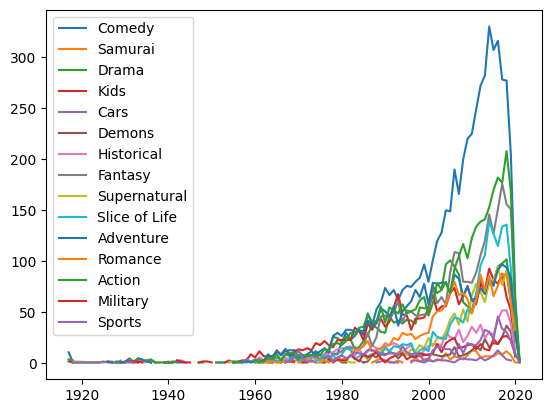

In [ ]:
df1 = df.iloc[:,:15]
df1.plot()

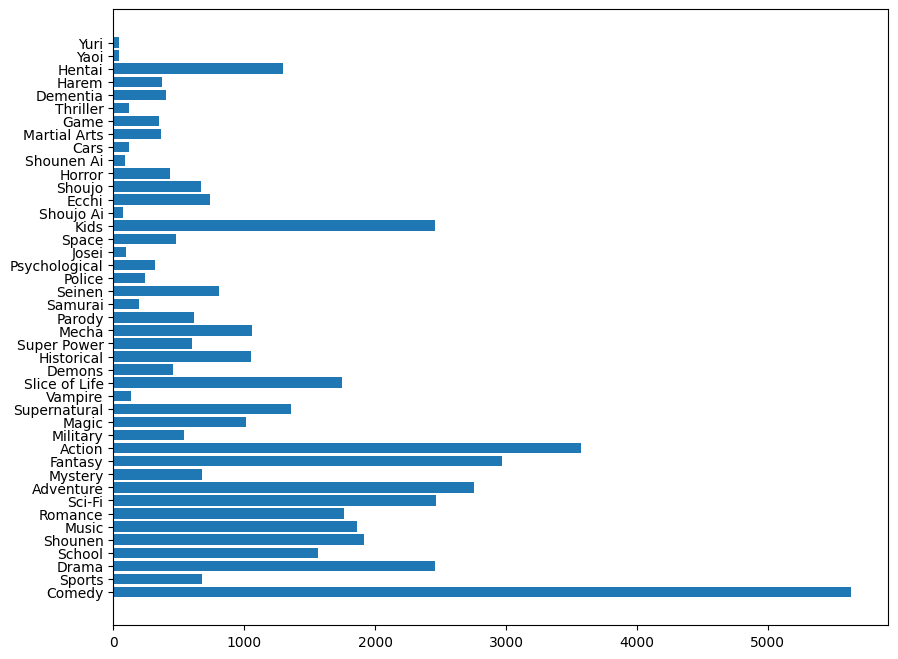

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.barh(range(len(genre_distribution)), list(genre_distribution.values()))
plt.yticks(range(len(genre_distribution)), list(genre_distribution.keys()))
plt.show()

<Axes: >

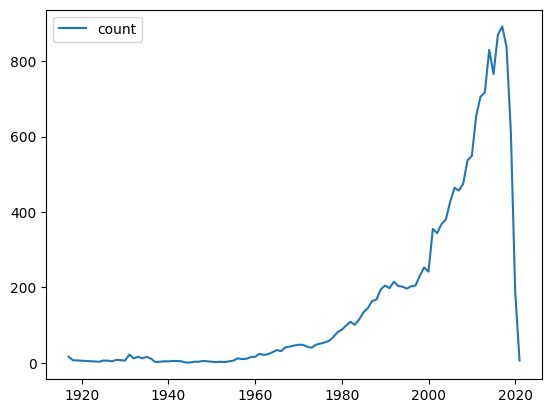

In [ ]:
myKeys = list(animes_year.keys())
myKeys.sort()
sorted_dict1 = {i: animes_year[i] for i in myKeys}

ani_yr = pd.DataFrame(sorted_dict1, index=['count']).T
ani_yr.plot()

Reviews.csv

-Total no of different fields in score

-Distribution of top fields

In [ ]:
reviews = pd.read_csv('reviews.csv')

In [ ]:
reviews.head()

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149


In [ ]:
total_no_of_reviews = len(reviews['uid'])
total_no_of_reviews

192112

In [ ]:
names=set()
scores = {}
for i,d in reviews.iterrows():
  # print(d['genre'].split("'"))
  l=d['scores'].split("'")
  if not d['anime_uid'] in scores:
    scores[d['anime_uid']] = {}
  for i in range(1,len(l),4):
    if not l[i] in scores[d['anime_uid']]:
      scores[d['anime_uid']][l[i]] = [int(l[i+2])]
    else:
      scores[d['anime_uid']][l[i]].append(int(l[i+2]))


In [ ]:
no_of_rev = {}
for key in scores.keys():
  no_of_rev[key] = len(scores[key]['Overall'])
  scores[key]['Overall'] = sum(scores[key]['Overall'])/len(scores[key]['Overall'])
  scores[key]['Character'] = sum(scores[key]['Character'])/len(scores[key]['Character'])
  scores[key]['Animation'] = sum(scores[key]['Animation'])/len(scores[key]['Animation'])
  scores[key]['Enjoyment'] = sum(scores[key]['Enjoyment'])/len(scores[key]['Enjoyment'])
  scores[key]['Story'] = sum(scores[key]['Story'])/len(scores[key]['Story'])
  scores[key]['Sound'] = sum(scores[key]['Sound'])/len(scores[key]['Sound'])
  scores[key]['AvgScoreCalculated'] = (scores[key]['Overall']+scores[key]['Character']+scores[key]['Animation']+scores[key]['Enjoyment']+scores[key]['Story']+scores[key]['Sound'])/6



In [ ]:
story = []
sound = []
animation = []
character = []
overall = []
enjoyment = []
norev = []
avgsc = []
for key in scores.keys():
  story.append(scores[key]['Story'])
  sound.append(scores[key]['Sound'])
  animation.append(scores[key]['Animation'])
  character.append(scores[key]['Character'])
  overall.append(scores[key]['Overall'])
  enjoyment.append(scores[key]['Enjoyment'])
  norev.append(no_of_rev[key])
  avgsc.append(scores[key]['AvgScoreCalculated'])

anime_review_score = pd.DataFrame()
anime_review_score['Anime ID'] = scores.keys()
anime_review_score['Overall'] = overall
anime_review_score['Animation'] = animation
anime_review_score['Character'] = character
anime_review_score['Sound'] = sound
anime_review_score['Enjoyment'] = enjoyment
anime_review_score['Story'] = story
anime_review_score['Avg.Score.Calculated'] = avgsc

anime_review_score['No of Reviews'] = norev

anime_review_score

,Anime ID,Overall,Animation,Character,Sound,Enjoyment,Story,Avg.Score.Calculated,No of Reviews
0,34096,8.176471,7.882353,8.705882,8.294118,7.235294,7.647059,7.990196,34
1,34599,8.655738,8.586885,7.819672,8.583607,8.288525,8.229508,8.360656,610
2,28891,8.788462,7.961538,8.000000,8.230769,8.307692,7.673077,8.160256,104
3,2904,8.719231,8.457692,8.373077,8.542308,8.803846,8.350000,8.541026,520
4,4181,9.195980,8.770519,9.021776,8.901173,9.003350,8.968174,8.976829,1194
...,...,...,...,...,...,...,...,...,...
8108,16934,7.250000,8.750000,8.000000,7.750000,7.500000,6.750000,7.666667,4
8109,2514,8.500000,8.000000,9.000000,8.500000,9.000000,8.500000,8.583333,2
8110,18753,6.750000,7.250000,7.250000,7.750000,7.500000,4.500000,6.833333,4
8111,10033,7.357143,7.214286,7.500000,7.857143,7.428571,7.214286,7.428571,14


In [ ]:
animelist1 = []
ranklist1 = []
for i,d in anime_review_score.iterrows():
  results = animes.loc[animes["uid"] == d['Anime ID']]
  try:
    name = results['title'].values[0]
    rank = int(results['ranked'].values[0])
    animelist1.append(name)
    ranklist1.append(rank)

  except:
    animelist1.append("NaN")
    ranklist1.append("NaN")


anime_review_score = anime_review_score.sort_values(by=['Avg.Score.Calculated'], ascending= False)
anime_review_score

,Anime ID,Overall,Animation,Character,Sound,Enjoyment,Story,Avg.Score.Calculated,No of Reviews
2177,39979,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,1
7093,4737,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,1
8060,2283,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,2
4583,15633,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,1
90,17949,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,2
...,...,...,...,...,...,...,...,...,...
5069,5193,1.0,0.0,0.0,0.0,0.0,0.0,0.166667,1
5434,11083,1.0,0.0,0.0,0.0,0.0,0.0,0.166667,1
2144,2480,1.0,0.0,0.0,0.0,0.0,0.0,0.166667,2
1344,28519,1.0,0.0,0.0,0.0,0.0,0.0,0.166667,2


In [ ]:
print(len(animelist1))

8113


In [ ]:
rank = list(range(1, len(anime_review_score)+1))
anime_review_score['Title'] = animelist1
anime_review_score['Rank Calculated Using Avg Score '] = rank
anime_review_score['Rank As Per Dataset'] = ranklist1

In [ ]:
anime_review_score[:25]

,Anime ID,Overall,Animation,Character,Sound,Enjoyment,Story,Avg.Score.Calculated,No of Reviews,Title,Rank Calculated Using Overall Score,Rank As Per Dataset,Rank Calculated Using Avg Score
2177,39979,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1,Gintama.,1,15,1
7093,4737,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1,Made in Abyss,2,23,2
8060,2283,10.0,10.0,10.0,10.0,10.0,10.0,10.0,2,Haikyuu!! Second Season,3,25,3
4583,15633,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1,Code Geass: Hangyaku no Lelouch R2,4,17,4
90,17949,10.0,10.0,10.0,10.0,10.0,10.0,10.0,2,Clannad: After Story,5,12,5
6581,13455,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1,Kaguya-hime no Monogatari,6,250,6
4132,8062,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1,Koukaku Kidoutai 2.0,7,500,7
4363,4353,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1,Fullmetal Alchemist: Brotherhood,8,1,8
4036,3484,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1,One Punch Man,9,50,9
2816,7953,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1,Nodame Cantabile: Finale - Mine to Kiyora no S...,10,750,10


Profiles.csv

-Gender distribution

-Age disribution

-Top favourite animes and check if it corresponds with popularity/rank in animes.csv

In [ ]:
profiles = pd.read_csv('profiles.csv')
profiles = profiles.drop_duplicates(subset=['profile'])

profiles.head()


,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '925...",https://myanimelist.net/profile/baekbeans
2,skrn,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382...",https://myanimelist.net/profile/aManOfCulture99


In [ ]:
total_no_of_profiles = len(profiles['profile'])
total_no_of_profiles

47885

In [ ]:
gender={}
fav_animes_count = {}
for i,d in profiles.iterrows():
  l=d['favorites_anime'].split("'")

  if not d['gender'] in gender:
    gender[d['gender']] = 1
  else:
    gender[d['gender']] += 1

  for i in range(1,len(l),2):
    if not l[i] in fav_animes_count:
      fav_animes_count[l[i]] = 1
    else:
      fav_animes_count[l[i]] += 1



In [ ]:
gender_dis = pd.DataFrame(gender, index=['count'])
gender_dis = gender_dis.T

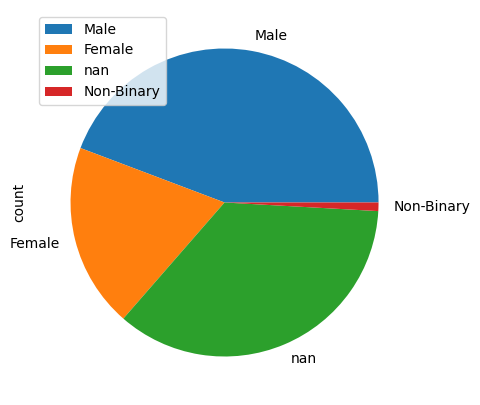

In [ ]:
plot = gender_dis.plot.pie(y='count', figsize=(5, 5))


In [ ]:
ani_ct = pd.DataFrame(fav_animes_count, index=['count'])
ani_ct = ani_ct.T

In [ ]:
ani = ani_ct.sort_values(by=['count'], ascending=False)

In [ ]:
animelist = []
ranklist = []
for i,d in ani.iterrows():
  results = animes.loc[animes["uid"] == int(i)]
  try:
    animelist.append(results['title'].values[0])
    ranklist.append(int(results['ranked'].values[0]))

  except:
    animelist.append("NaN")
    ranklist.append("NaN")


In [ ]:
rank = list(range(1, len(ani)+1))
ani['Title'] = animelist
ani['Rank Calculated Using Favourite Count'] = rank
ani['Rank As Per Dataset'] = ranklist

In [ ]:
ani[:25]

,count,Title,Rank Calculated Using Favourite Count,Rank As Per Dataset
5114,4915,Fullmetal Alchemist: Brotherhood,1,1
9253,4624,Steins;Gate,2,2
1535,3360,Death Note,3,52
11061,3149,Hunter x Hunter (2011),4,3
4181,2792,Clannad: After Story,5,12
1575,2779,Code Geass: Hangyaku no Lelouch,6,31
2001,2636,Tengen Toppa Gurren Lagann,7,44
1,2400,Cowboy Bebop,8,26
30,2315,Neon Genesis Evangelion,9,208
21,2130,One Piece,10,86


In [ ]:
animes.sort_values(by=['ranked'])[:25][['uid','title','ranked','popularity','score']]

,uid,title,ranked,popularity,score
3,5114,Fullmetal Alchemist: Brotherhood,1.0,4,9.23
773,9253,Steins;Gate,2.0,7,9.11
772,11061,Hunter x Hunter (2011),3.0,20,9.11
771,32281,Kimi no Na wa.,4.0,15,9.09
770,38524,Shingeki no Kyojin Season 3 Part 2,5.0,175,9.07
769,28977,Gintama°,6.0,351,9.05
768,9969,Gintama',7.0,353,9.04
767,820,Ginga Eiyuu Densetsu,8.0,620,9.03
766,35180,3-gatsu no Lion 2nd Season,9.0,657,9.02
765,28851,Koe no Katachi,10.0,53,9.01


In [ ]:
# X